<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [34]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline


<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------
<br>The Surface Area will be given in integral as <br>
$$ \text{Surface Area} = 4 \pi \beta c \int_0^1 \frac{\sqrt{1-t^2}}{\sqrt{(1-t^2)(1-\alpha^2 t^2)}}dt,\hspace{5mm} \alpha = \frac{\beta^2}{c^2}$$


-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


<ipython-input-16-4e578a054feb>:10: RuntimeWarning: divide by zero encountered in double_scalars
  area = 2 * np.pi * b**2 * (1 + (c / (a *b* math.asin(e))))
<ipython-input-16-4e578a054feb>:9: RuntimeWarning: invalid value encountered in sqrt
  e = np.sqrt(1 - b**2 / c**2)
<ipython-input-16-4e578a054feb>:17: RuntimeWarning: invalid value encountered in sqrt
  denom = np.sqrt(num * (1 - (b * t**2)))


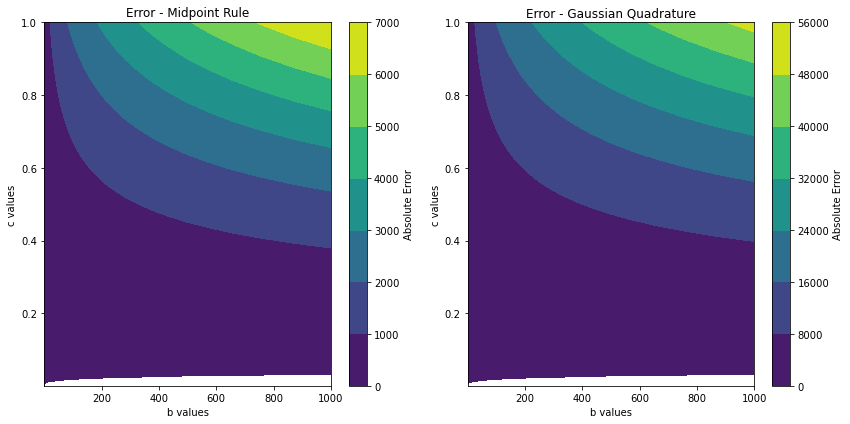

In [16]:
from scipy.special import roots_legendre
from scipy.special import legendre
from scipy.integrate import dblquad
from scipy import integrate
import math 
from scipy.optimize import newton

def Area_formula (a, b, c):
    e = np.sqrt(1 - b**2 / c**2)
    area = 2 * np.pi * b**2 * (1 + (c / (a *b* math.asin(e))))
    return area

def Integrand(t, beta, c):
    constant = 4 * np.pi * beta * c
    num = np.sqrt(1 - t**2)
    b = beta**2 / c**2
    denom = np.sqrt(num * (1 - (b * t**2)))
    return 4 * np.pi * beta * c * num/denom

def gaussian_quadrature_weights_and_roots(M, a, b):
    def legendre_polynomial(x, m):
        return legendre(m)(x)

    roots = []
    weights = []

    for m in range(1, M + 1):
        x0 = np.cos((4 * m - 1) * np.pi / (4 * M + 2))
        root = newton(legendre_polynomial, x0, args=(m,))
        weight = 2 / ((1 - root**2) * legendre(m).deriv()(root)**2)
        roots.append(root)
        weights.append(weight)

    return np.array(roots), np.array(weights)

def gaussian_quadrature(func, a, b, n, order):
    def legendre_polynomial(x, m):
        return legendre(m)(x)

    roots, weights = gaussian_quadrature_weights_and_roots(order, a, b)
    return np.sum(weights * func((b - a) / 2 * roots + (a + b) / 2))

def midpoint_rule(func, a, b, n):
    h = (b - a) / n
    integral = 0.0
    for i in range(n):
        x_mid = a + h * (i + 0.5)  # Midpoint calculation
        integral += func(x_mid)
    integral *= h
    return integral

b_values = np.logspace(-3, 0, 100)
c_values = np.logspace(-3, 3, 100)

b_grid, c_grid = np.meshgrid(b_values, c_values)
error_midpoint = np.zeros_like(b_grid)
error_gauss = np.zeros_like(b_grid)

true_area = np.zeros_like(b_grid)
x=0

for i in range(len(b_values)):
    for j in range(len(c_values)):
        b = b_values[i]
        c = c_values[j]
        true_area = Area_formula(1, b, c)
        approx_area_midpoint = midpoint_rule(lambda x:Integrand(x, b, c), 0, 1, 100)
        approx_area_gaussian = gaussian_quadrature(lambda x:Integrand(x, b, c), 0, 1, 100, order=5)
        error_midpoint[i, j] = np.abs(true_area - approx_area_midpoint)
        error_gauss[i, j] = np.abs(true_area - approx_area_gaussian)
        
plt.figure(figsize=(12, 6))

# Heatmap for error_midpoint
plt.subplot(1, 2, 1)
plt.title('Error - Midpoint Rule')
plt.xlabel('b values')
plt.ylabel('c values')
plt.contourf(c_grid, b_grid, error_midpoint, cmap='viridis')
plt.colorbar(label='Absolute Error')
#plt.xscale('log')
#plt.yscale('log')

# Heatmap for error_gauss
plt.subplot(1, 2, 2)
plt.title('Error - Gaussian Quadrature')
plt.xlabel('b values')
plt.ylabel('c values')
plt.contourf(c_grid, b_grid, error_gauss, cmap='viridis')
plt.colorbar(label='Absolute Error')
#plt.xscale('log')
#plt.yscale('log')

plt.tight_layout()
plt.show()


## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



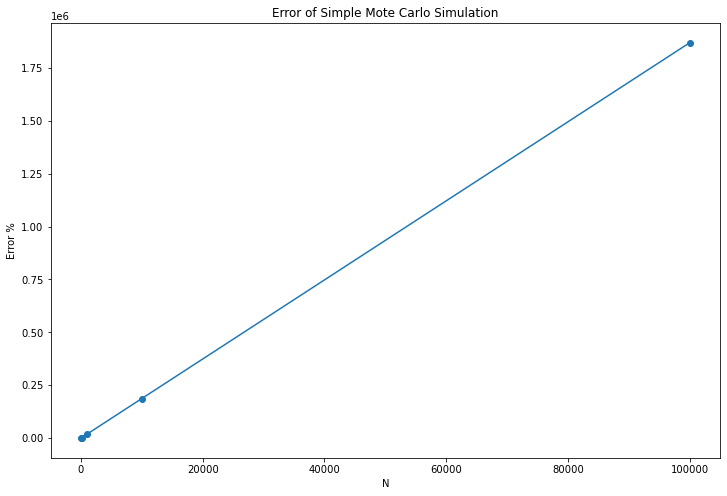

In [61]:

def MonteCarlo_U01(fun, a, b, num_samples):
    total = 0
    for _ in range(num_samples):
        x = np.random.uniform(a, b)
        total += fun(x)
    
    average = total / num_samples
    integral = (b - a) * average
    return integral

sample_size = np.array([10, 100, 1000, 10000, 100000])
a = 1
beta = 1/2
Start = 0
End = 1
error_MC = np.zeros(5)
j = 0

for n in sample_size:
    
    actual_value = Area_formula(beta, End)
    
    MC_value = Mote_Carlo(lambda x:Integrand(1/2, 1, x), Start, End, n)
    
    error_MC[j] = np.abs(actual_value - MC_value) / actual_value * 100
    j += 1
    
plt.figure(figsize=(12, 8))
plt.plot(sample_size, error_MC, marker = 'o')
plt.title('Error of Simple Mote Carlo Simulation')
plt.xlabel('N')
plt.ylabel('Error %')

plt.show()

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



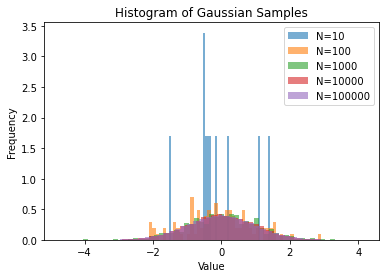

In [20]:
# https://medium.com/mti-technology/how-to-generate-gaussian-samples-3951f2203ab0 #

def box_muller(mu, sigma, size):
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)
    
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    return z1 * sigma + mu, z2 * sigma + mu

def plot_histogram(mu, sigma, sample_sizes):
    for size in sample_sizes:
        samples, _ = box_muller(mu, sigma, size)
        
        plt.hist(samples, bins=50, density=True, alpha=0.6, label=f"N={size}")
    
    
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    #plt.plot(x, y, 'k--', linewidth=2, label='Gaussian Distribution')

    plt.title('Histogram of Gaussian Samples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


mean = 0
std_dev = 1
sample_sizes = [10, 100, 1000, 10000, 100000]


plot_histogram(mean, std_dev, sample_sizes)


## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





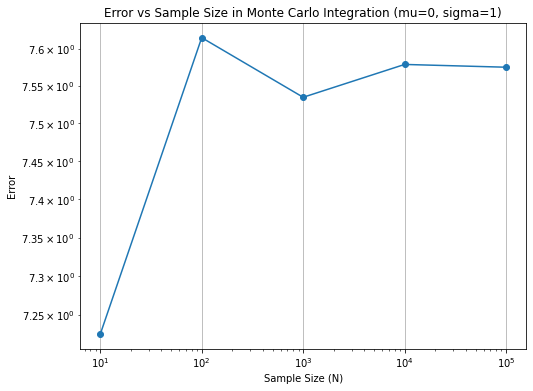

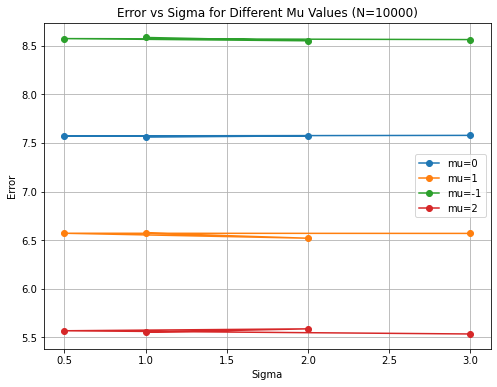

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to calculate the actual integral
def Area_formula(a, b, c):
    e = np.sqrt(1 - b**2 / c**2)
    area = 2 * np.pi * b**2 * (1 + (c / (a * b * math.asin(e))))
    return area

# Function to perform Monte Carlo integration
def monte_carlo_integration(mu, sigma, N):
    samples = np.random.normal(mu, sigma, N)
    integral = np.mean(samples)  # Replace this with your function to integrate
    return integral

# Constants
a = 0.5  # Lower limit
c = 1    # Constant
true_value = Area_formula(a, a, c)  # True value of the integral

# Part A - Varying sample sizes with mu=0, sigma=1
sample_sizes = [10, 100, 1000, 10000, 100000]
errors_sample_sizes = []

for N in sample_sizes:
    integral = monte_carlo_integration(0, 1, N)
    error = abs(true_value - integral)
    errors_sample_sizes.append(error)

# Plot errors for varying sample sizes
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, errors_sample_sizes, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Error vs Sample Size in Monte Carlo Integration (mu=0, sigma=1)')
plt.grid(True)
plt.show()

# Part B - Varying mu and sigma with fixed sample size N=10000
sample_size_fixed = 10000
mus = [0, 1, -1, 2]  # Different values of mu to test
sigmas = [1, 2, 0.5, 3]  # Different values of sigma to test
errors_mu_sigma = np.zeros((len(mus), len(sigmas)))

for i, mu_val in enumerate(mus):
    for j, sigma_val in enumerate(sigmas):
        integral = monte_carlo_integration(mu_val, sigma_val, sample_size_fixed)
        error = abs(true_value - integral)
        errors_mu_sigma[i, j] = error

# Plot errors for varying mu and sigma
plt.figure(figsize=(8, 6))
for i, mu_val in enumerate(mus):
    plt.plot(sigmas, errors_mu_sigma[i, :], marker='o', label=f'mu={mu_val}')

plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Error vs Sigma for Different Mu Values (N=10000)')
plt.legend()
plt.grid(True)
plt.show()


 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

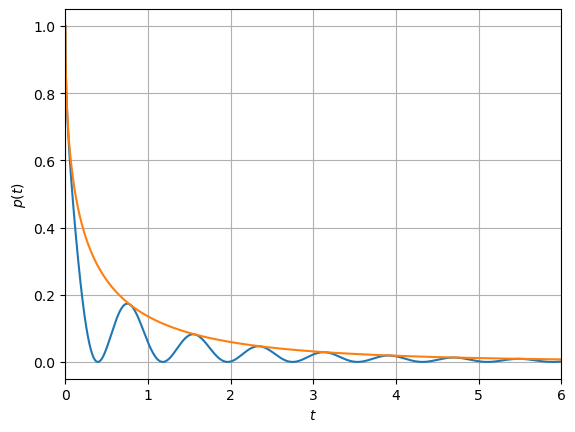

In [23]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



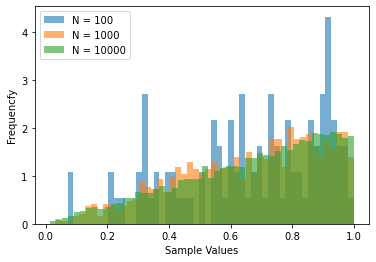

In [11]:
'''--------------------Write your code below this line------------------------------'''
def f(t):
    return np.random.uniform(0, t)

def rejection_sampling(N, a, b):
    samples = []
    max_attempts = 10000
    for _ in range(N):
        for i in range(max_attempts):
            t = np.random.uniform(0, b)
            u = np.random.uniform(0, b)
            if u <= f(t):
                samples.append(t)
                break
    return np.array(samples)

N = [100, 1000, 10000]
a = 4
b = 1

for n in N:
    samples = rejection_sampling(n, a, b)
    
    plt.hist(samples, bins=50, alpha = 0.6, density=True, label=f'N = {n}')

plt.xlabel("Sample Values")
plt.ylabel("Frequencfy")
plt.legend()
plt.show()


## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


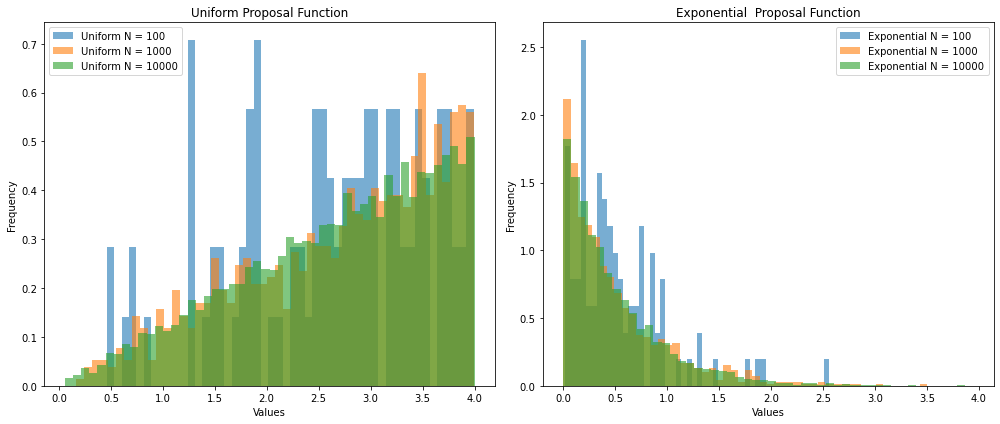

In [31]:
'''--------------------Write your code below this line------------------------------'''
def F(t):
    return np.exp(-2 * t)

def rejection(N, a, b):
    samples = []
    max_attempts = 10000
    for _ in range(N):
        for i in range(max_attempts):
            t = np.random.uniform(0, b)
            u = np.random.uniform(0, b)
            if u <= F(t):
                samples.append(t)
                break
    return np.array(samples)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
N = [100, 1000, 10000]
for n in N:
    
    samples = rejection_sampling(n, a, b)
    
    
    ax = axs[0]
    ax.hist(samples, bins=50, alpha=0.6, density=True, label=f'Uniform N = {n}')
    ax.set_title('Uniform Proposal Function')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()
for n in N:
    sample = rejection(n, a, b)
    ax = axs[1]
    ax.hist(sample, bins=50, alpha=0.6, density=True, label=f'Exponential N = {n}')
    ax.set_title('Exponential  Proposal Function')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

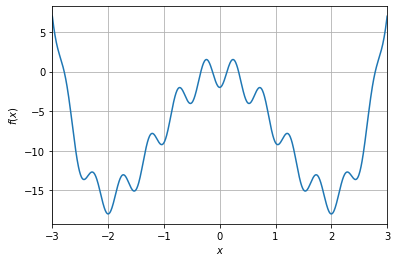

In [51]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 


Do you get consistent results? 

In [39]:
import cv2
theta_0 = [-1, 0.5, 3]

def H(x):
    return x**4-8*x**2 - 2*np.cos(4*np.pi*x)

def grad_H(x):
    return 4 * x**3 - 16 * x + 8 * np.pi * np.sin(4*np.pi*x)


def Gradient_descent(t_0, alpha, max_iterations=1000, threshold=1e-5):
    
    
    t = t_0                        
    iteration = 0 
    x_values = []
    y_values = []
    
    
    while iteration < max_iterations:
        gradient = grad_H(t)
        t_1 = t - alpha * gradient
        
        if abs(t_1 - t) < threshold:
            break
        t = t_1
        iteration += 1
        x_values.append(t)
        y_values.append(H(t))
        
        
        
    return x_values, y_values


for guess in theta_0:
    output_video = f'gradient_descent_{guess}.mp4'
    fps = 10
    frame_size = (800, 600)
    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, frame_size)
    x_vals, y_vals = Gradient_descent(guess, 0.001)

    for i in range(len(x_vals)):
        
        plt.plot(np.linspace(-3, 3, 1000), H(np.linspace(-3, 3, 1000)), label='f(θ)')
        plt.scatter(x_vals[i], y_vals[i], color='red', label='Guessed')
        plt.title(f'Gradient Descent from θ0 = {guess}')
        plt.xlabel('θ')
        plt.ylabel('f(θ)')
        plt.legend()
        plt.savefig(f'gradient_descent_{guess}.png')
        plt.close()
        img = cv2.imread(f'gradient_descent_{guess}.png')
        img = cv2.resize(img, frame_size)
        video_writer.write(img)
    video_writer.release()

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

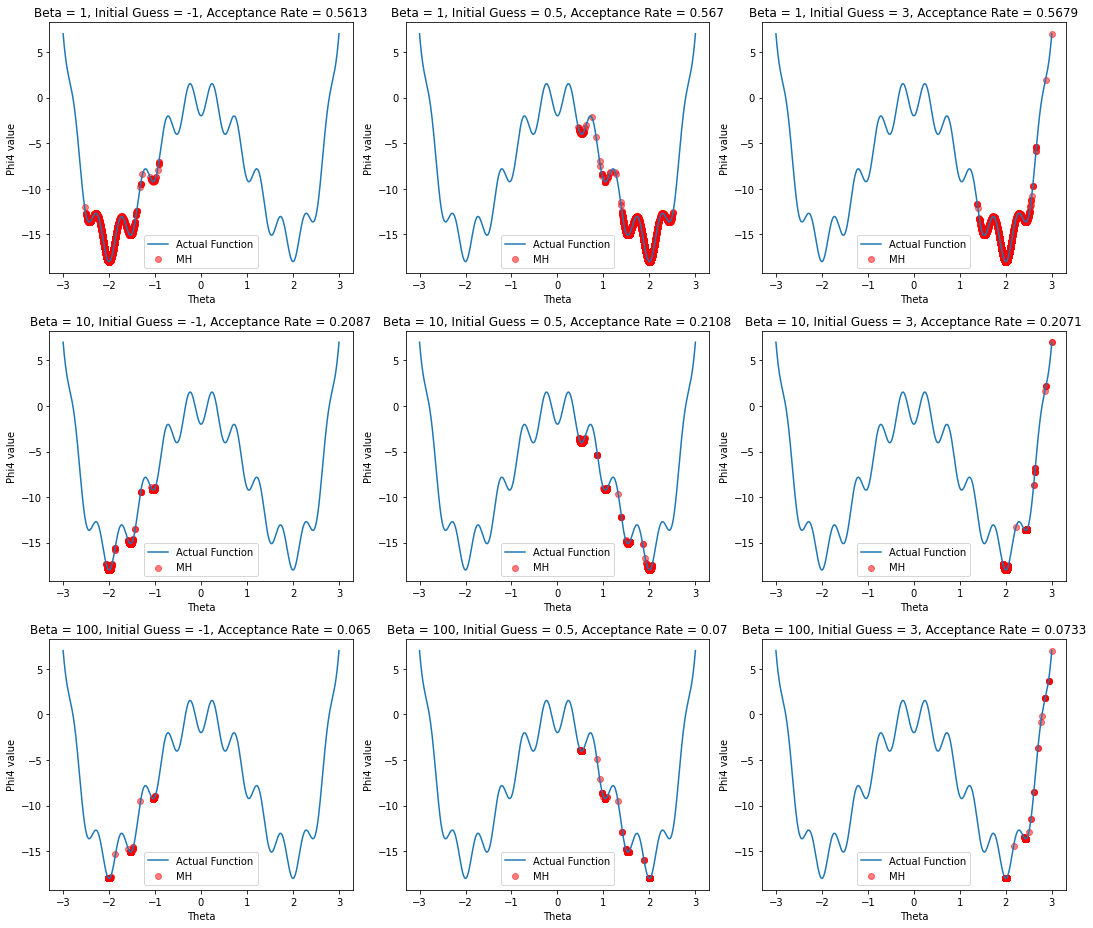

In [123]:
theta_0 = [-1, 0.5, 3]

def Metropolis_Hasting(theta, beta, sigma, number):
    current_theta = theta
    theta_vals = [theta]
    accepted = 0
    for _ in range(number):
        theta_proposed = current_theta + np.random.normal(0, sigma)
        delta_H = H(theta_proposed) - H(current_theta)
        
        r = np.exp(-beta * delta_H)
        
        if np.random.rand() < r:
            current_theta = theta_proposed
            accepted += 1
        
        theta_vals.append(current_theta)
        
    acceptance_rate = accepted / number
    return theta_vals, acceptance_rate

beta = [1, 10, 100]
sigma = .1
fig, axs = plt.subplots(3, 3, figsize=(15, 13))
for i, b in enumerate(beta):
    for j, t in enumerate(theta_0):
        theta_value, acc_rate = Metropolis_Hasting(t, b, sigma, 10000)
        axs[i, j].plot(x, y, label='Actual Function')
        axs[i, j].scatter(theta_value, H(np.array(theta_value)), color='red', alpha=0.5, label='MH')
        axs[i, j].set_title(f"Beta = {b}, Initial Guess = {t}, Acceptance Rate = {acc_rate}")
        axs[i, j].set_xlabel("Theta")
        axs[i, j].set_ylabel("Phi4 value")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

<ipython-input-125-deb25d59ab60>:11: RuntimeWarning: overflow encountered in exp
  r = np.exp(-beta * delta_H)
<ipython-input-125-deb25d59ab60>:11: RuntimeWarning: overflow encountered in exp
  r = np.exp(-beta * delta_H)
<ipython-input-125-deb25d59ab60>:11: RuntimeWarning: overflow encountered in exp
  r = np.exp(-beta * delta_H)


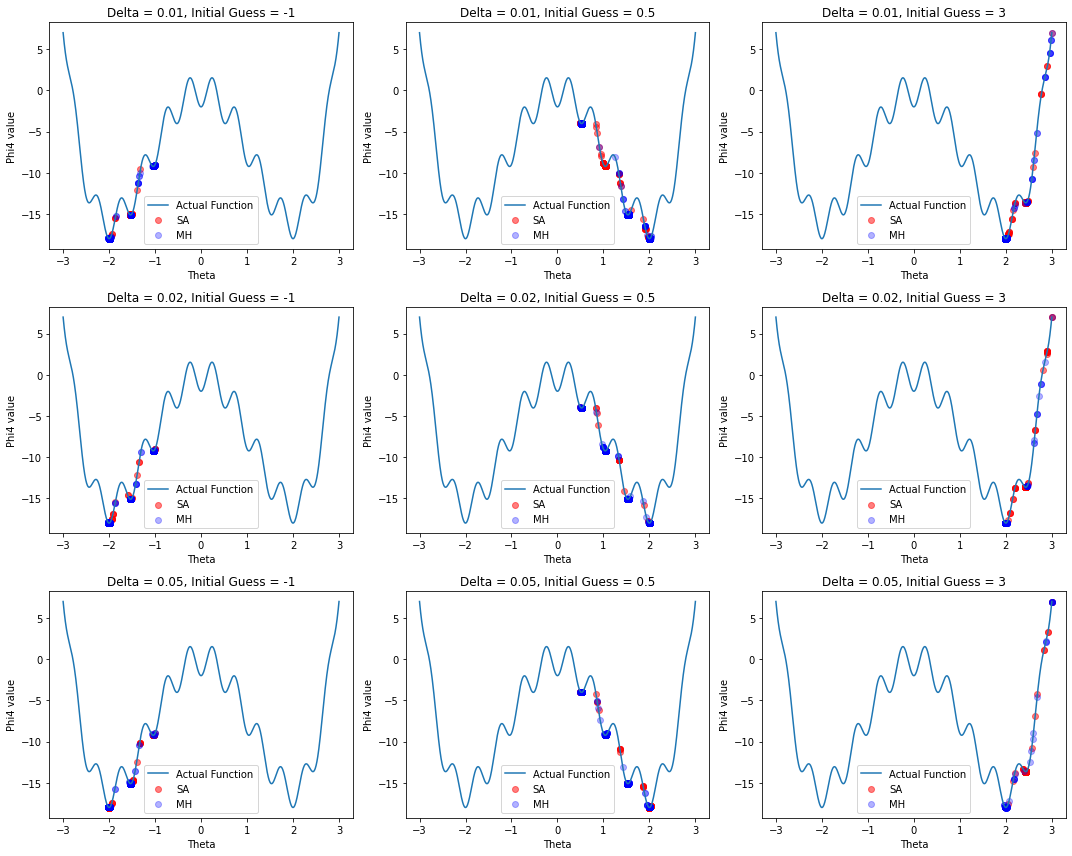

In [125]:
def Metropolis_Hasting_Cooling(theta, beta, delta, sigma, number):
    current_theta = theta
    chnage = delta
    theta_vals = [theta]
    accepted = 0
    for _ in range(number):
        beta += delta
        theta_proposed = current_theta + np.random.normal(0, sigma)
        delta_H = H(theta_proposed) - H(current_theta)
        
        r = np.exp(-beta * delta_H)
        
        if r > 1 or np.random.uniform(0, 1) < r:
            current_theta = theta_proposed
            accepted += 1
        
        theta_vals.append(current_theta)
        
    acceptance_rate = accepted / number
    return theta_vals, acceptance_rate
beta = 100
sigma = .1
delta = [0.01, 0.02, 0.05]
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, d in enumerate(delta):
    for j, t in enumerate(theta_0):
        theta_values, acc_rates = Metropolis_Hasting_Cooling(t, beta, d, sigma, 8000)
        theta_value, acc_rates = Metropolis_Hasting(t, beta, sigma, 5000)
        axs[i, j].plot(x, y, label='Actual Function')
        axs[i, j].scatter(theta_values, H(np.array(theta_values)), color='red', alpha=0.5, label='SA')
        axs[i, j].scatter(theta_value, H(np.array(theta_value)), color='blue', alpha=0.3, label='MH')
        axs[i, j].set_title(f"Delta = {d}, Initial Guess = {t}")
        axs[i, j].set_xlabel("Theta")
        axs[i, j].set_ylabel("Phi4 value")
        axs[i, j].legend()

plt.tight_layout()
plt.show()